# Introduction


Our aim for this project is to allocate optimum budget to the right assets in such a way that our risk is minimum and we achieve our expected income. This project would help us to manage our portfolio of stocks in the most effecient manner.We are using mean-variance portfolio optmization mode.

We are trying to maximise our return based on our tolerence for risk. Since these two variables i.e. risk and return are conflicting, we cannot optimize both of them at once. Hence for given a given risk tolereance ceiling we are trying to maximise our profit in turn we will find the allocation of stocks that would maximize our return for each risk level.

# Import Modules and Packages

In [ ]:
# some useful modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *


In [ ]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si # Importing the module with all the stock price data and renaming it as 'si'

In [ ]:
# install pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # THIS IS NEW! We are using the IPOPT Solver.
except:
    pass

# Data Prep

In [ ]:
# Mount drive to link to .csv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read a .csv file of returns
# make sure you navigate to your file and update the path!
# df1 = pd.read_csv('/content/drive/MyDrive/OPIM 5641: Business Decision Modeling/AllStocks.csv')
#df1 = pd.read_csv('/content/drive/MyDrive/Business Decision Modeling - OPIM 5641/Module 4/Group Project 2/AllStocks.csv')
df1 = pd.read_csv('/content/drive/MyDrive/OPIM5641_G4/Project2/AllStocks.csv')
df1

,Symbol,Name,Green%,Sector
0,AJG,Arthur J. Gallagher & Company,NaN,Financials
1,AMP,Ameriprise Financial Services,NaN,Financials
2,AON,AON Plc,NaN,Financials
3,AXP,American Express Company,NaN,Financials
4,BRK.B,Berkshire Hathaway Cl B,NaN,Financials
...,...,...,...,...
88,PKG,Packaging Corp of America,2.70%,Materials
89,DFS,Discover Financial Services,0.00%,Financials
90,RJF,Raymond James Financial,0.00%,Financials
91,SYF,Synchrony Financial,0.00%,Financials


In [ ]:
#Drop all rows with NA in Green% column
df1 = df1[df1['Green%'].notna()]
#Replace string "%" to ""
df1['Green%'] = df1['Green%'].str.replace('%', '')
#Convert Green% to numeric
df1['Green%'] = pd.to_numeric(df1['Green%'])
df1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Symbol,Name,Green%,Sector
37,ECL,Ecolab Inc,81.6,Materials
38,SEE,Sealed Air Corp,78.0,Materials
39,BLL,Ball Corp,67.3,Materials
40,MET,Metlife Inc,61.7,Financials
41,PPG,PPG Industries,61.5,Materials
42,AFL,Aflac Inc,60.8,Financials
43,PRU,Prudential Financial Inc,56.5,Financials
44,C,Citigroup Inc,53.0,Financials
45,DOW,Dow Inc,49.7,Materials
46,STT,State Street Corp,49.6,Financials


# Analysing all the stocks

## Histogram: Green% by Sector
Higher the green percentage then greener the company

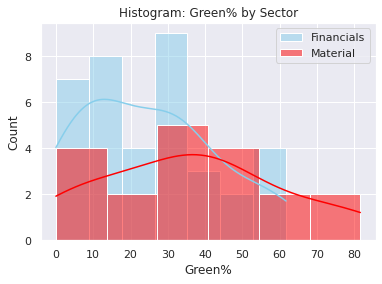

In [ ]:
df_fin = df1[df1['Sector'] == 'Financials']
df_mat = df1[df1['Sector'] == 'Materials']
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
#Add Financial Histrogram with distribution curve 
sns.histplot(data=df_fin, x="Green%",color="skyblue", label="Financials", kde=True)
#Add Materials Histrogram with distribution curve 
sns.histplot(data=df_mat, x="Green%",color="red", label="Material", kde=True)
plt.legend() 
plt.title('Histogram: Green% by Sector')
plt.show()

## Boxplot: Green% by Sector
Boxplot shows the median green% is higher for Materials than Financials 

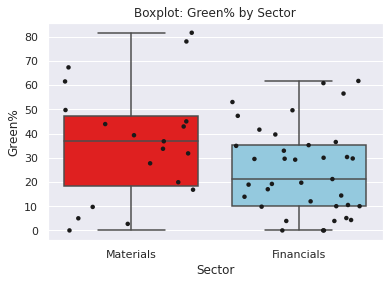

In [ ]:
# boxplot
my_color = {"Financials": "skyblue","Materials": "red"}
ax = sns.boxplot(x='Sector', y='Green%', data=df1, palette=my_color)
# add stripplot
ax = sns.stripplot(x='Sector', y='Green%', data=df1, color="k", jitter=0.4, size=4.5)
# add title
plt.title("Boxplot: Green% by Sector")
plt.show()

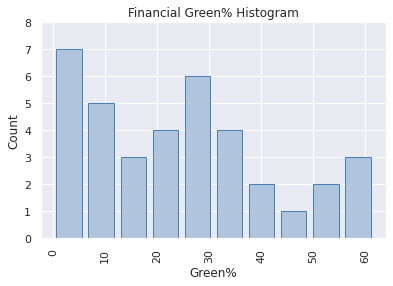

In [ ]:
df_fin = df1[df1['Sector'] == 'Financials']
df_fin['Green%'].hist(bins=10,rwidth=.8,by=df1['Sector'],color='lightsteelblue',edgecolor='steelblue')
plt.plot()
plt.ylim(0,8)
plt.xlabel('Green%')
plt.ylabel('Count')
plt.title('Financial Green% Histogram')
plt.show()

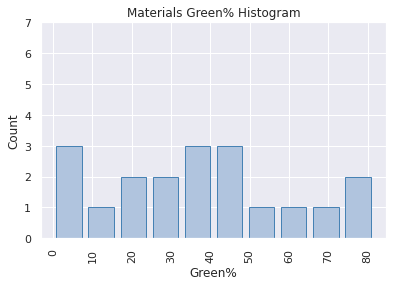

In [ ]:
df_mat = df1[df1['Sector'] == 'Materials']
df_mat['Green%'].hist(bins=10,rwidth=.8,by=df1['Sector'],color='lightsteelblue',edgecolor='steelblue')
plt.plot()
plt.ylim(0,7)
plt.xlabel('Green%')
plt.ylabel('Count')
plt.title('Materials Green% Histogram')
plt.show()

 
## Top 10 Green stocks

In [ ]:
#Top 10 Green stocks from both sectors sorted by largest Green%
df2 = df1.sort_values(by = 'Green%', ascending=False).head(10) 
df2

,Symbol,Name,Green%,Sector
37,ECL,Ecolab Inc,81.6,Materials
38,SEE,Sealed Air Corp,78.0,Materials
39,BLL,Ball Corp,67.3,Materials
40,MET,Metlife Inc,61.7,Financials
41,PPG,PPG Industries,61.5,Materials
42,AFL,Aflac Inc,60.8,Financials
43,PRU,Prudential Financial Inc,56.5,Financials
44,C,Citigroup Inc,53.0,Financials
45,DOW,Dow Inc,49.7,Materials
46,STT,State Street Corp,49.6,Financials


## Top 10 Dirty stocks


In [ ]:
#Bottom 10 Dirty stocks from both Sectors sorted by lowest Green% (NUE replaces WRK for modeling)
df3 = df1.sort_values('Green%').head(11) #Note we include 11 stocks instead of  here because WRK had errors from yahoo stocks price and was replaced in our dirty list with NUE for modeling
df3

,Symbol,Name,Green%,Sector
92,WRK,Westrock Company,0.0,Materials
89,DFS,Discover Financial Services,0.0,Financials
91,SYF,Synchrony Financial,0.0,Financials
90,RJF,Raymond James Financial,0.0,Financials
88,PKG,Packaging Corp of America,2.7,Materials
87,CINF,Cincinnati Financial,3.9,Financials
86,AIZ,Assurant Inc,3.9,Financials
85,WRB,W.R. Berkley Corp,4.3,Financials
84,CE,Celanese Corp,5.0,Materials
83,RF,Regions Financial Corp,5.1,Financials


##Trends in stocks

We see that green stocks have equal proportion of stocks from Finance and Materials sectors but then in the case of dirty stocks almost all of them are from finance sector

# Model 1 - Green stocks


## Extracting Data and Setting up our inputs to the model

Select Ticker List

In [ ]:
# Assign the ticker list that we want to scrap
# will not run if ECL is not there...can change everything else
tickers_list = ['ECL','SEE','BLL','MET','PPG','AFL','PRU','C','DOW','STT']

# pull historical price data for each stocks to match with our news score later
# creating a dictionary with the 'ticker' symbol, from May 1, 2020 to December 31, 2020
# and daily resolution -> '1d'
# We will be using the 'tickers_list' created above to access the corresponding stock values and store them here
dow_prices = {ticker : si.get_data(ticker,start_date = '05/01/2020',end_date='12/31/2020',interval='1d') for ticker in tickers_list}

Checking our work.

In [ ]:
# take a peak!
dow_prices

{'AFL':                  open       high        low  ...   adjclose   volume  ticker
 2020-05-01  36.290001  36.630001  35.970001  ...  35.567970  3425200     AFL
 2020-05-04  36.049999  36.099998  35.150002  ...  34.722961  3522700     AFL
 2020-05-05  35.860001  36.639999  35.860001  ...  34.888081  3421600     AFL
 2020-05-06  35.529999  35.970001  34.279999  ...  33.295189  4079500     AFL
 2020-05-07  34.869999  36.459999  34.840000  ...  34.839512  2977600     AFL
 ...               ...        ...        ...  ...        ...      ...     ...
 2020-12-23  43.419998  43.900002  43.139999  ...  43.223843  5450700     AFL
 2020-12-24  43.669998  43.930000  43.380001  ...  43.531662  1383500     AFL
 2020-12-28  44.080002  44.750000  43.910000  ...  43.611099  2282700     AFL
 2020-12-29  44.160000  44.320000  43.700001  ...  43.442295  2386700     AFL
 2020-12-30  43.869999  44.480000  43.830002  ...  43.700466  1954500     AFL
 
 [169 rows x 7 columns],
 'BLL':                  open 

**Extract Data**

let's extract just the data we need (adjclose)

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the ECL (one sample)
prep_data = pd.DataFrame(dow_prices['ECL']['adjclose']).rename(columns = {"adjclose":"ECL"})


# extracting the adjclose price (daily close price) for all the samples
# Here each column of the data frame represents one stock from our 'tickers_list', so 10 columns
# And the rows give the time frame selected while extracting the stock values/data into the data dic 'dow_prices'
# Each row corresponds to a single day from from May 1, 2020 to December 31, 2020
# Hence, 169 days
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,ECL,SEE,BLL,MET,PPG,AFL,PRU,C,DOW,STT
2020-05-01,188.292618,27.776352,65.132980,33.059090,86.397537,35.567970,55.815361,44.135750,32.064499,57.307976
2020-05-04,189.798965,26.782228,65.669060,32.582455,85.248840,34.722961,55.196648,43.747913,31.242332,56.648369
2020-05-05,191.582794,28.760632,65.778267,32.668251,86.662621,34.888081,55.074780,42.613491,31.535282,56.337971
2020-05-06,191.295395,27.038141,65.242180,31.429010,87.182968,33.295189,50.734417,41.643902,30.202810,54.640461
2020-05-07,192.375595,28.081480,65.410942,33.294830,88.714554,34.839512,53.171772,43.282505,31.043875,56.493172
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,212.843140,46.072086,91.450699,45.700188,143.301254,43.223843,75.704193,60.266277,54.148258,70.637878
2020-12-24,215.636871,45.932590,92.179428,45.878513,144.426788,43.531662,75.654900,60.058056,54.187817,70.835243
2020-12-28,214.220047,45.364662,91.211121,45.819069,142.604019,43.611099,75.822502,60.613323,53.693314,71.170769
2020-12-29,213.990555,45.115570,92.079597,45.581306,142.335083,43.442295,75.260551,60.395180,53.732876,70.993134


**Percent Change**

Rather than using the raw time series, we will be building a model based on past returns (the difference from the previous day).

So we will be using the **percentage change** b/w the stock values on a day to day basis

In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return

return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
# drop the na records
return_data.dropna(inplace=True)
return_data

,ECL,SEE,BLL,MET,PPG,AFL,PRU,C,DOW,STT
2020-05-04,0.008000,-0.035790,0.008231,-0.014418,-0.013295,-0.023758,-0.011085,-0.008787,-0.025641,-0.011510
2020-05-05,0.009399,0.073870,0.001663,0.002633,0.016584,0.004755,-0.002208,-0.025931,0.009377,-0.005479
2020-05-06,-0.001500,-0.059891,-0.008150,-0.037934,0.006004,-0.045657,-0.078809,-0.022753,-0.042253,-0.030131
2020-05-07,0.005647,0.038588,0.002587,0.059366,0.017567,0.046383,0.048041,0.039348,0.027847,0.033907
2020-05-08,0.018751,0.038906,-0.020185,0.022648,0.023706,0.010873,0.039845,0.037634,0.045053,0.033997
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,-0.008782,0.023688,-0.009515,0.020349,-0.005736,0.011620,0.023867,0.025650,0.001463,0.019803
2020-12-24,0.013126,-0.003028,0.007969,0.003902,0.007854,0.007122,-0.000651,-0.003455,0.000731,0.002794
2020-12-28,-0.006570,-0.012364,-0.010505,-0.001296,-0.012621,0.001825,0.002215,0.009246,-0.009126,0.004737
2020-12-29,-0.001071,-0.005491,0.009522,-0.005189,-0.001886,-0.003871,-0.007411,-0.003599,0.000737,-0.002496


In [ ]:
return_data.shape 
# 1 row less than before, since we are calculating the percent change of the current stock value 
# with its value one day before 

(168, 10)

## Visualizing the Time Series

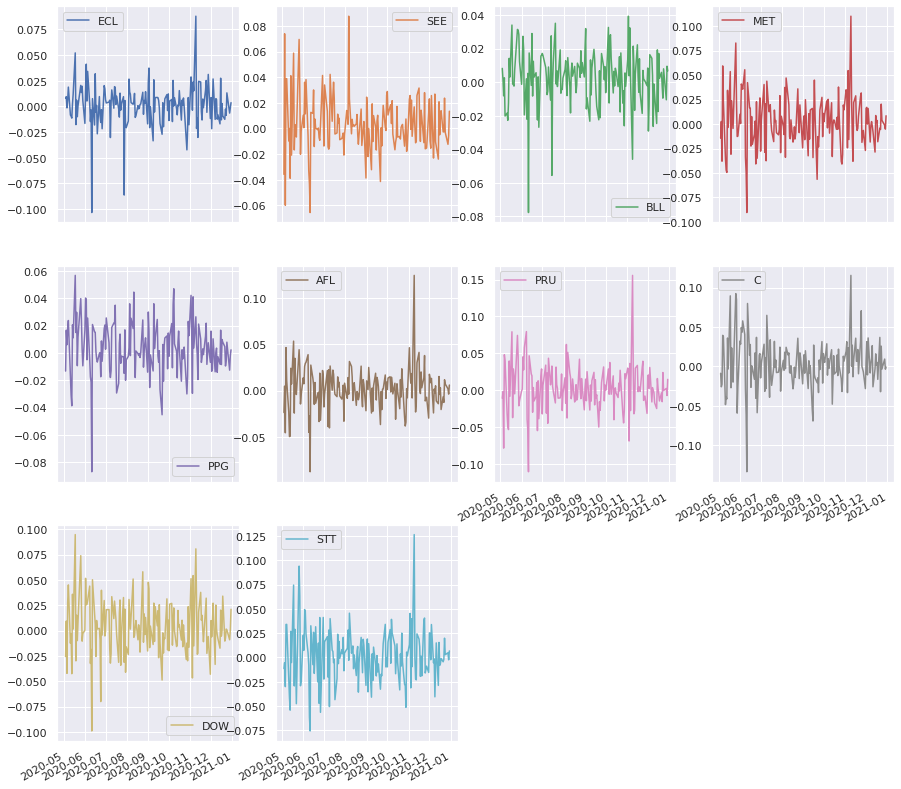

In [ ]:
# Plotting the stock value changes over time (daily resolution)
return_data.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(15,15))
plt.show()

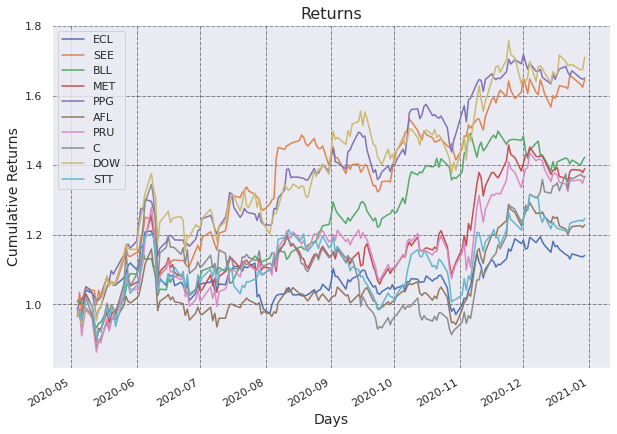

In [ ]:
# Plot all the close prices (A time series view of the Cumulative Returns)
((prep_data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Days', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

**Covariance Matrix**

In [ ]:
# Covariance Matrix
Covariance_matrix = return_data.cov()
Covariance_matrix

,ECL,SEE,BLL,MET,PPG,AFL,PRU,C,DOW,STT
ECL,0.000397,0.000217,0.000151,0.000313,0.000263,0.000289,0.000371,0.000327,0.000365,0.000311
SEE,0.000217,0.000469,0.000122,0.000338,0.000252,0.000302,0.000389,0.000373,0.000354,0.000345
BLL,0.000151,0.000122,0.000277,0.000140,0.000148,0.000114,0.000145,0.000136,0.000188,0.000166
MET,0.000313,0.000338,0.000140,0.000718,0.000363,0.000565,0.000790,0.000684,0.000543,0.000629
PPG,0.000263,0.000252,0.000148,0.000363,0.000366,0.000294,0.000412,0.000369,0.000387,0.000354
AFL,0.000289,0.000302,0.000114,0.000565,0.000294,0.000533,0.000656,0.000574,0.000461,0.000523
PRU,0.000371,0.000389,0.000145,0.000790,0.000412,0.000656,0.000979,0.000813,0.000641,0.000738
C,0.000327,0.000373,0.000136,0.000684,0.000369,0.000574,0.000813,0.000976,0.000554,0.000713
DOW,0.000365,0.000354,0.000188,0.000543,0.000387,0.000461,0.000641,0.000554,0.000731,0.000517
STT,0.000311,0.000345,0.000166,0.000629,0.000354,0.000523,0.000738,0.000713,0.000517,0.000787


**Correlation Matrix**

In [ ]:
# Correlation Matrik
Corr_matrix = return_data.corr()
Corr_matrix

,ECL,SEE,BLL,MET,PPG,AFL,PRU,C,DOW,STT
ECL,1.000000,0.503570,0.456124,0.585657,0.689471,0.626937,0.594555,0.525127,0.678230,0.556404
SEE,0.503570,1.000000,0.339124,0.581784,0.608693,0.604050,0.574717,0.551741,0.605200,0.567781
BLL,0.456124,0.339124,1.000000,0.313456,0.464876,0.297262,0.278858,0.262424,0.417105,0.355133
MET,0.585657,0.581784,0.313456,1.000000,0.708473,0.913660,0.943094,0.817595,0.749482,0.836773
PPG,0.689471,0.608693,0.464876,0.708473,1.000000,0.665998,0.687772,0.616896,0.747905,0.658827
AFL,0.626937,0.604050,0.297262,0.913660,0.665998,1.000000,0.907425,0.795162,0.738299,0.807748
PRU,0.594555,0.574717,0.278858,0.943094,0.687772,0.907425,1.000000,0.831624,0.757813,0.840720
C,0.525127,0.551741,0.262424,0.817595,0.616896,0.795162,0.831624,1.000000,0.656470,0.813620
DOW,0.678230,0.605200,0.417105,0.749482,0.747905,0.738299,0.757813,0.656470,1.000000,0.681398
STT,0.556404,0.567781,0.355133,0.836773,0.658827,0.807748,0.840720,0.813620,0.681398,1.000000


**Covariance Table**

In [ ]:
# creating covariance table on stock return dataframe
df_cov = return_data.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') # return/blank line

Covariance Matrix:
          ECL       SEE       BLL  ...         C       DOW       STT
ECL  0.000397  0.000217  0.000151  ...  0.000327  0.000365  0.000311
SEE  0.000217  0.000469  0.000122  ...  0.000373  0.000354  0.000345
BLL  0.000151  0.000122  0.000277  ...  0.000136  0.000188  0.000166
MET  0.000313  0.000338  0.000140  ...  0.000684  0.000543  0.000629
PPG  0.000263  0.000252  0.000148  ...  0.000369  0.000387  0.000354
AFL  0.000289  0.000302  0.000114  ...  0.000574  0.000461  0.000523
PRU  0.000371  0.000389  0.000145  ...  0.000813  0.000641  0.000738
C    0.000327  0.000373  0.000136  ...  0.000976  0.000554  0.000713
DOW  0.000365  0.000354  0.000188  ...  0.000554  0.000731  0.000517
STT  0.000311  0.000345  0.000166  ...  0.000713  0.000517  0.000787

[10 rows x 10 columns]




**Average Return**

In [ ]:
# create the average of each stock
# these are the objective function COEFFICIENTS!
df_return = return_data.mean()
print('Average Return:')
print(df_return)

Average Return:
ECL    0.000983
SEE    0.003202
BLL    0.002242
MET    0.002319
PPG    0.003172
AFL    0.001490
PRU    0.002349
C      0.002348
DOW    0.003564
STT    0.001702
dtype: float64


## Setting up the Model (Green Stocks)

In [ ]:
from pyomo.environ import *
m = ConcreteModel()

# defining variables
# each one is a stock (ECL, SEE, BLL, MET, PPG...)
m.ECL = Var(within=NonNegativeReals, bounds=(0,1)) # bounds are 0 to 1, cause it does not make sense to invest more than 100% of our money in one stock
m.SEE = Var(within=NonNegativeReals, bounds=(0,1))
m.BLL = Var(within=NonNegativeReals, bounds=(0,1))
m.MET = Var(within=NonNegativeReals, bounds=(0,1))
m.PPG = Var(within=NonNegativeReals, bounds=(0,1))
m.AFL = Var(within=NonNegativeReals, bounds=(0,1))
m.PRU = Var(within=NonNegativeReals, bounds=(0,1))
m.C   = Var(within=NonNegativeReals, bounds=(0,1))
m.DOW = Var(within=NonNegativeReals, bounds=(0,1))
m.STT = Var(within=NonNegativeReals, bounds=(0,1))

In [ ]:
# declare objective
m.objective = Objective(expr =               
                        m.ECL*df_return[0] + 
                        m.SEE*df_return[1] + 
                        m.BLL*df_return[2] +
                        m.MET*df_return[3] + 
                        m.PPG*df_return[4] +
						            m.AFL*df_return[5] +
                        m.PRU*df_return[6] +
                        m.C*df_return[7] +
                        m.DOW*df_return[8] +
                        m.STT*df_return[9],
                        sense=maximize) # yes, we want to MAX our returns!

# declare constraints
# 1. Sum of all porportions = 1
m.sum_proportions = Constraint(expr = m.ECL + m.SEE + m.BLL + m.MET + m.PPG + m.AFL + m.PRU + m.C + m.DOW + m.STT == 1)

# 2. Minimum return should be 0.00009 or 0.009%
m.return_floor = Constraint(expr = m.objective >= 0.00009)

In [ ]:
# creating calculations table to calculate the risk
# 3. Max risk should be less than 0.0015

max_risk = 0.0015
def calc_risk():
  # this is a list of all of your investment allocations (proportion invested in each stock)
  # this is UPDATED as the model is cranking - see how we are referncing the decision variables?
  proportions = [ m.ECL, m.SEE, m.BLL, m.MET, m.PPG, m.AFL, m.PRU, m.C, m.DOW, m.STT]
  risk_matrix = [] # an empty list
  
  # now we iterate across the covariance matrix
  # 'risk elements' are = cov(A,B)*prop(A)*prop(B)
  # since there are 10 stocks, there are 10*10 = 100 elements
  # sum these 100 elements up at the end! that's the risk.
  for index, col in enumerate(df_cov.columns): # referencing columns using df_cov.columns, where index = matrix index (0 -5)
   
    i = 0
    risk = []
    for row in df_cov[col]:         # referencing row values using df_cov[col], actual covariannces,
      
      
      risk.append(proportions[index]*row*proportions[i])
      
      i = i + 1
    risk_matrix.append(risk)
  risk_matrix = pd.DataFrame(risk_matrix)
  return risk_matrix.sum().sum() 

# defining risk limits. This is what psioptparam() does.
# risk_limits = [0.001, 0.0015] # this is just two options

# this is a sequence of options - better!
# array of elements in the range 0.000001 to 0.001, incremented by 0.000005
risk_limits = np.arange(0.000, 0.001, 0.00005)
risk_limits


array([0.0e+00, 5.0e-05, 1.0e-04, 1.5e-04, 2.0e-04, 2.5e-04, 3.0e-04,
       3.5e-04, 4.0e-04, 4.5e-04, 5.0e-04, 5.5e-04, 6.0e-04, 6.5e-04,
       7.0e-04, 7.5e-04, 8.0e-04, 8.5e-04, 9.0e-04, 9.5e-04])

In [ ]:
shape(risk_limits)

(20,)

In [ ]:
# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations , dictionary
returns = {} # key=risk, value = return, dictionary
for r in risk_limits:
  m.total_risk = Constraint(expr = calc_risk() <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_analysis[r] = [m.ECL(), m.SEE(), m.BLL(), m.MET(), m.PPG(), m.AFL(), m.PRU(), m.C(), m.DOW(), m.STT()]
  # store our returns
  returns[r] =  m.ECL()*df_return[0] + m.SEE()*df_return[1] + m.BLL()*df_return[2] + m.MET()*df_return[3] + m.PPG()*df_return[4] + m.AFL()*df_return[5]    + m.PRU()*df_return[6]   + m.C()*df_return[7]     + m.DOW()*df_return[8]    + m.STT()*df_return[9]

    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time

## Parameter Analysis
Let's see what the efficient frontier looks like, and the allocation!

In [ ]:
param_analysis 

{0.0: [0.11813760740721324,
  0.14852966641574417,
  0.5471712074972248,
  2.875491055525034e-08,
  0.11752133011846815,
  0.06864009842888442,
  1.0284939727921241e-08,
  2.2372715119439844e-08,
  9.917764545180187e-09,
  1.8802133171329726e-08],
 5e-05: [0.11813760368547131,
  0.14852945698108444,
  0.5471713284916223,
  2.8754566016723834e-08,
  0.11752152063567253,
  0.06864000007460366,
  1.0284859053036095e-08,
  2.2372359064959624e-08,
  9.917756017886753e-09,
  1.8802003413058233e-08],
 0.0001: [0.11813753033850773,
  0.14852950901801426,
  0.5471713951919789,
  2.8754680983956762e-08,
  0.11752138715584248,
  0.0686400881638342,
  1.0284878464463484e-08,
  2.237245531990932e-08,
  9.917750790269472e-09,
  1.8802054709118033e-08],
 0.00015000000000000001: [0.11813762445081423,
  0.14852834094269085,
  0.5471748238196138,
  2.874870767103585e-08,
  0.1175194413738469,
  0.068639679296347,
  1.0283563525877763e-08,
  2.236698341854796e-08,
  9.917413484509218e-09,
  1.88000170481

In [ ]:
returns 

{0.0: 0.0022933270782326226,
 5e-05: 0.0022933271328066827,
 0.0001: 0.002293327084783547,
 0.00015000000000000001: 0.0022933243417142175,
 0.0002: 0.00229332706992664,
 0.00025: 0.0029336320675942464,
 0.00030000000000000003: 0.0031135284604284865,
 0.00035: 0.0032437065475592894,
 0.0004: 0.003319713117019114,
 0.00045000000000000004: 0.003373879749449501,
 0.0005: 0.003418360713232959,
 0.00055: 0.0034570165097449965,
 0.0006000000000000001: 0.003491599615005966,
 0.0006500000000000001: 0.0035218437209677497,
 0.0007: 0.0035486297916186233,
 0.00075: 0.00356386989270814,
 0.0008: 0.0035638699831095294,
 0.0008500000000000001: 0.003563870745900155,
 0.0009000000000000001: 0.0035638699867340386,
 0.00095: 0.0035638699105174443}

In [ ]:
param_analysis 

{0.0: [0.11813760740721324,
  0.14852966641574417,
  0.5471712074972248,
  2.875491055525034e-08,
  0.11752133011846815,
  0.06864009842888442,
  1.0284939727921241e-08,
  2.2372715119439844e-08,
  9.917764545180187e-09,
  1.8802133171329726e-08],
 5e-05: [0.11813760368547131,
  0.14852945698108444,
  0.5471713284916223,
  2.8754566016723834e-08,
  0.11752152063567253,
  0.06864000007460366,
  1.0284859053036095e-08,
  2.2372359064959624e-08,
  9.917756017886753e-09,
  1.8802003413058233e-08],
 0.0001: [0.11813753033850773,
  0.14852950901801426,
  0.5471713951919789,
  2.8754680983956762e-08,
  0.11752138715584248,
  0.0686400881638342,
  1.0284878464463484e-08,
  2.237245531990932e-08,
  9.917750790269472e-09,
  1.8802054709118033e-08],
 0.00015000000000000001: [0.11813762445081423,
  0.14852834094269085,
  0.5471748238196138,
  2.874870767103585e-08,
  0.1175194413738469,
  0.068639679296347,
  1.0283563525877763e-08,
  2.236698341854796e-08,
  9.917413484509218e-09,
  1.88000170481

## Optimal Stock Allocation

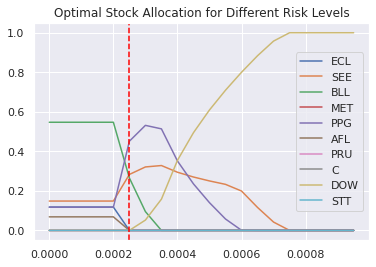

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = [ 'ECL','SEE','BLL','MET','PPG','AFL','PRU','C','DOW','STT']
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
#plt.axvline(x=0.0002,color='red', linestyle='--')
plt.axvline(x=0.00025,color='red', linestyle='--')
plt.show()

## Efficient Frontier

In [ ]:
# subset
riskm1 = list(returns.keys()) # coerce dict_keys to a list
print(riskm1)
rewardm1 = list(returns.values()) # coerce dict_values to a list
print(rewardm1) # we aren't allowed to name our value 'return' - this is a reserved name.

[0.0, 5e-05, 0.0001, 0.00015000000000000001, 0.0002, 0.00025, 0.00030000000000000003, 0.00035, 0.0004, 0.00045000000000000004, 0.0005, 0.00055, 0.0006000000000000001, 0.0006500000000000001, 0.0007, 0.00075, 0.0008, 0.0008500000000000001, 0.0009000000000000001, 0.00095]
[0.0022933270782326226, 0.0022933271328066827, 0.002293327084783547, 0.0022933243417142175, 0.00229332706992664, 0.0029336320675942464, 0.0031135284604284865, 0.0032437065475592894, 0.003319713117019114, 0.003373879749449501, 0.003418360713232959, 0.0034570165097449965, 0.003491599615005966, 0.0035218437209677497, 0.0035486297916186233, 0.00356386989270814, 0.0035638699831095294, 0.003563870745900155, 0.0035638699867340386, 0.0035638699105174443]


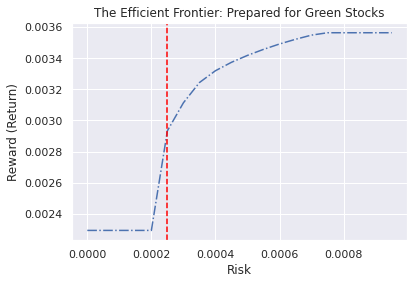

In [ ]:
# plot! pylab makes it easy
from pylab import *
plot(riskm1, rewardm1, '-.')
title('The Efficient Frontier: Prepared for Green Stocks')
xlabel('Risk')
ylabel('Reward (Return)')
plt.axvline(x=0.00025,color='red', linestyle='--')
plt.show()

Note: At the risk level between 0.0002 and 0.00025 we can rapidly increase the growth in our returns with only a small increase in risk. Beyond this point our return begins to diminish with an increase in risk.

# Model 2 - Dirty Stocks

## Extracting Data and Setting up our inputs to the model
 Select Ticker List

In [ ]:
# Assign the ticker list that we want to scrap


tickers_list = ['DFS','RJF','SYF','PKG','AIZ','CINF','WRB','CE','RF', 'NUE']

# pull historical price data for each stocks to match with our news score later
# creating a dictionary with the 'ticker' symbol, from May 1, 2020 to December 31, 2020
# and daily resolution -> '1d'
# We will be using the 'tickers_list' created above to access the corresponding stock values and store them here
dow_prices = {ticker : si.get_data(ticker,start_date = '05/01/2020',end_date='12/31/2020',interval='1d') for ticker in tickers_list}

In [ ]:
# take a peak!
dow_prices

{'AIZ':                   open        high         low  ...    adjclose  volume  ticker
 2020-05-01  104.339996  105.419998  101.519997  ...  100.130577  440500     AIZ
 2020-05-04  102.129997  102.290001   98.690002  ...   97.860214  450800     AIZ
 2020-05-05  101.050003  103.660004  101.019997  ...   99.905495  721400     AIZ
 2020-05-06  104.919998  105.500000   97.349998  ...   95.824722  850900     AIZ
 2020-05-07   98.680000  102.529999   98.260002  ...   96.480385  520900     AIZ
 ...                ...         ...         ...  ...         ...     ...     ...
 2020-12-23  131.570007  133.449997  131.570007  ...  131.728012  260600     AIZ
 2020-12-24  132.550003  132.850006  131.850006  ...  131.907043   86700     AIZ
 2020-12-28  132.990005  134.039993  132.500000  ...  132.662964  188300     AIZ
 2020-12-29  133.889999  133.889999  132.009995  ...  131.817535  204500     AIZ
 2020-12-30  132.429993  134.529999  132.429993  ...  133.309464  210900     AIZ
 
 [169 rows x 7 colu

**Extract Data**

let's extract just the data we need (adjclose)

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the DFS (one sample)
prep_data = pd.DataFrame(dow_prices['DFS']['adjclose']).rename(columns = {"adjclose":"DFS"})

# prep_data = pd.DataFrame(dow_prices['WRK']['adjclose']).rename(columns = {"adjclose":"WRK"})


# extracting the adjclose price (daily close price) for all the samples
# Here each column of the data frame represents one stock from our 'tickers_list', so 11 columns
# And the rows give the time frame selected while extracting the stock values/data into the data dic 'dow_prices'
# Each row corresponds to a single day May 1, 2020 to December 31, 2020
# Hence, 169 days
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,DFS,RJF,SYF,PKG,AIZ,CINF,WRB,CE,RF,NUE
2020-05-01,40.142197,62.064037,18.065084,91.928261,100.130577,59.098125,51.151844,77.962639,9.742455,39.721218
2020-05-04,40.142197,61.415699,17.987007,92.927582,97.860214,58.322433,51.082253,76.517616,9.732876,39.779350
2020-05-05,39.880211,61.661285,17.567345,90.696075,99.905495,57.207375,51.450104,76.684731,9.560443,39.479012
2020-05-06,37.978378,61.405876,16.884169,90.696075,95.824722,51.506031,49.690361,76.262032,9.244315,39.236809
2020-05-07,39.278614,63.291965,17.557583,90.996849,96.480385,53.338600,50.833702,78.984970,9.435909,39.634022
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,87.964546,93.369087,33.922066,134.760208,131.728012,85.214287,65.980003,128.698944,15.822291,51.892933
2020-12-24,87.884918,92.247261,33.753098,135.127579,131.907043,84.737068,66.099998,129.156494,15.832217,51.764606
2020-12-28,87.884918,94.093796,33.743160,135.802719,132.662964,86.864693,66.089996,127.087593,15.842144,51.438858
2020-12-29,87.616150,93.309517,33.723282,134.700653,131.817535,85.731285,65.730003,126.828987,15.633695,51.409245


**Percent Change**

In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return

return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
# drop the na records
return_data.dropna(inplace=True)
return_data

,DFS,RJF,SYF,PKG,AIZ,CINF,WRB,CE,RF,NUE
2020-05-04,0.000000,-0.010446,-0.004322,0.010871,-0.022674,-0.013125,-0.001360,-0.018535,-0.000983,0.001464
2020-05-05,-0.006526,0.003999,-0.023331,-0.024013,0.020900,-0.019119,0.007201,0.002184,-0.017717,-0.007550
2020-05-06,-0.047689,-0.004142,-0.038889,0.000000,-0.040846,-0.099661,-0.034203,-0.005512,-0.033066,-0.006135
2020-05-07,0.034236,0.030715,0.039884,0.003316,0.006842,0.035580,0.023009,0.035705,0.020726,0.010123
2020-05-08,0.055336,0.037250,0.035019,0.046380,0.002130,0.013089,0.011735,0.029496,0.047716,0.031533
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,0.017619,0.003307,0.026158,0.014349,0.007225,0.020843,0.009177,-0.006298,0.033052,-0.009795
2020-12-24,-0.000905,-0.012015,-0.004981,0.002726,0.001359,-0.005600,0.001819,0.003555,0.000627,-0.002473
2020-12-28,0.000000,0.020017,-0.000294,0.004996,0.005731,0.025109,-0.000151,-0.016019,0.000627,-0.006293
2020-12-29,-0.003058,-0.008335,-0.000589,-0.008115,-0.006373,-0.013048,-0.005447,-0.002035,-0.013158,-0.000576


In [ ]:
return_data.shape 
# 1 row less than before, since we are calculating the percent change of the current stock value 
# with its value one day before 

(168, 10)

## Visualizing the Time Series

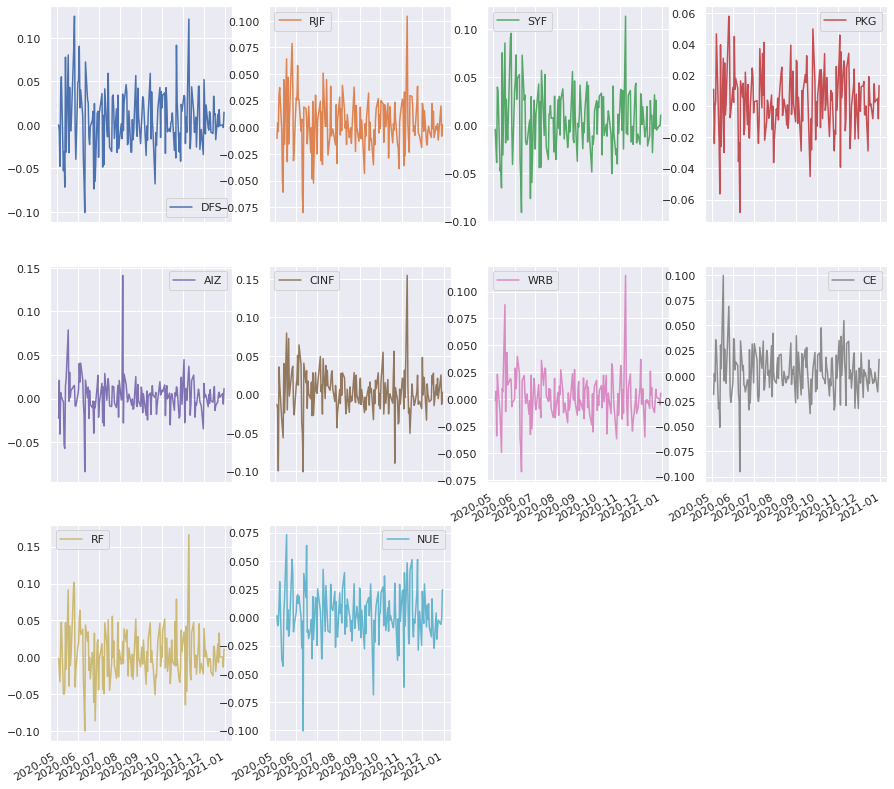

In [ ]:
# Plotting the stock value changes over time (daily resolution)
return_data.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(15,15))

plt.show()

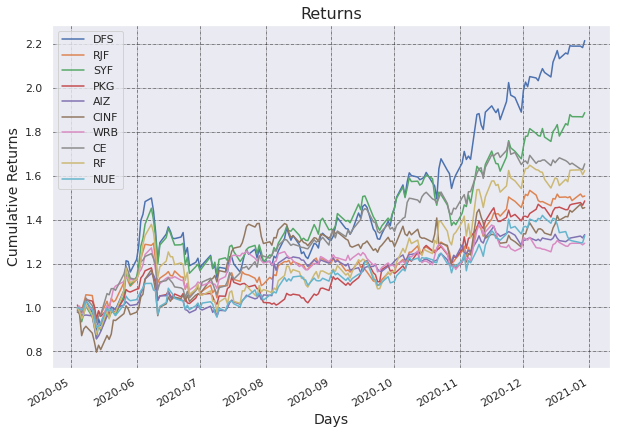

In [ ]:
# Plot all the close prices (A time series view of the Cumulative Returns)
((prep_data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Days', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

**Covariance Matrix**

In [ ]:
# Covariance Matrix
Covariance_matrix = return_data.cov()
Covariance_matrix

,DFS,RJF,SYF,PKG,AIZ,CINF,WRB,CE,RF,NUE
DFS,0.001276,0.000765,0.001105,0.000521,0.000475,0.000658,0.000515,0.000622,0.001089,0.000627
RJF,0.000765,0.000650,0.000705,0.000374,0.000359,0.000512,0.000417,0.000442,0.000784,0.000440
SYF,0.001105,0.000705,0.001087,0.000470,0.000446,0.000666,0.000495,0.000578,0.000985,0.000581
PKG,0.000521,0.000374,0.000470,0.000431,0.000232,0.000357,0.000276,0.000330,0.000491,0.000371
AIZ,0.000475,0.000359,0.000446,0.000232,0.000475,0.000382,0.000303,0.000314,0.000485,0.000302
CINF,0.000658,0.000512,0.000666,0.000357,0.000382,0.000891,0.000517,0.000399,0.000680,0.000393
WRB,0.000515,0.000417,0.000495,0.000276,0.000303,0.000517,0.000463,0.000344,0.000572,0.000324
CE,0.000622,0.000442,0.000578,0.000330,0.000314,0.000399,0.000344,0.000524,0.000607,0.000454
RF,0.001089,0.000784,0.000985,0.000491,0.000485,0.000680,0.000572,0.000607,0.001224,0.000619
NUE,0.000627,0.000440,0.000581,0.000371,0.000302,0.000393,0.000324,0.000454,0.000619,0.000567


**Correlation Matrix**

In [ ]:
# Correlation Matrik
Corr_matrix = return_data.corr()
Corr_matrix

,DFS,RJF,SYF,PKG,AIZ,CINF,WRB,CE,RF,NUE
DFS,1.000000,0.840125,0.938136,0.702274,0.609597,0.617087,0.669735,0.761170,0.871301,0.737455
RJF,0.840125,1.000000,0.838104,0.707115,0.645324,0.672363,0.758990,0.757888,0.878662,0.724038
SYF,0.938136,0.838104,1.000000,0.687209,0.620050,0.676369,0.697492,0.766101,0.854043,0.739720
PKG,0.702274,0.707115,0.687209,1.000000,0.513536,0.575669,0.618583,0.695255,0.675926,0.751127
AIZ,0.609597,0.645324,0.620050,0.513536,1.000000,0.586826,0.645721,0.630337,0.635643,0.581979
CINF,0.617087,0.672363,0.676369,0.575669,0.586826,1.000000,0.804446,0.584673,0.651701,0.553181
WRB,0.669735,0.758990,0.697492,0.618583,0.645721,0.804446,1.000000,0.698771,0.759640,0.632354
CE,0.761170,0.757888,0.766101,0.695255,0.630337,0.584673,0.698771,1.000000,0.758989,0.833707
RF,0.871301,0.878662,0.854043,0.675926,0.635643,0.651701,0.759640,0.758989,1.000000,0.743166
NUE,0.737455,0.724038,0.739720,0.751127,0.581979,0.553181,0.632354,0.833707,0.743166,1.000000


**Covariance Table**

In [ ]:
# creating covariance table on stock return dataframe
df_cov = return_data.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') # return/blank line

Covariance Matrix:
           DFS       RJF       SYF  ...        CE        RF       NUE
DFS   0.001276  0.000765  0.001105  ...  0.000622  0.001089  0.000627
RJF   0.000765  0.000650  0.000705  ...  0.000442  0.000784  0.000440
SYF   0.001105  0.000705  0.001087  ...  0.000578  0.000985  0.000581
PKG   0.000521  0.000374  0.000470  ...  0.000330  0.000491  0.000371
AIZ   0.000475  0.000359  0.000446  ...  0.000314  0.000485  0.000302
CINF  0.000658  0.000512  0.000666  ...  0.000399  0.000680  0.000393
WRB   0.000515  0.000417  0.000495  ...  0.000344  0.000572  0.000324
CE    0.000622  0.000442  0.000578  ...  0.000524  0.000607  0.000454
RF    0.001089  0.000784  0.000985  ...  0.000607  0.001224  0.000619
NUE   0.000627  0.000440  0.000581  ...  0.000454  0.000619  0.000567

[10 rows x 10 columns]




**Average Return**

In [ ]:
# create the average of each stock
# these are the objective function COEFFICIENTS!
df_return = return_data.mean()
print('Average Return:')
print(df_return)

Average Return:
DFS     0.005370
RJF     0.002767
SYF     0.004321
PKG     0.002569
AIZ     0.001937
CINF    0.002673
WRB     0.001754
CE      0.003257
RF      0.003486
NUE     0.001964
dtype: float64


## Setting up the model (Dirty Stocks)

In [ ]:
m = ConcreteModel()

# defining variables
# each one is a stock (NUE, DFS, RJF, SYF, PKG...)

m.DFS  = Var(within=NonNegativeReals, bounds=(0,1))
m.RJF  = Var(within=NonNegativeReals, bounds=(0,1))
m.SYF  = Var(within=NonNegativeReals, bounds=(0,1))
m.PKG  = Var(within=NonNegativeReals, bounds=(0,1))
m.AIZ  = Var(within=NonNegativeReals, bounds=(0,1))
m.CINF = Var(within=NonNegativeReals, bounds=(0,1))
m.WRB  = Var(within=NonNegativeReals, bounds=(0,1))
m.CE   = Var(within=NonNegativeReals, bounds=(0,1))
m.RF   = Var(within=NonNegativeReals, bounds=(0,1))
m.NUE  = Var(within=NonNegativeReals, bounds=(0,1))

In [ ]:
# declare objective
m.objective = Objective(expr =               
                        # m.WRK*df_return[0] + 
                        m.DFS*df_return[0] + 
                        m.RJF*df_return[1] +
                        m.SYF*df_return[2] + 
                        m.PKG*df_return[3] +
						            m.AIZ*df_return[4] +
                        m.CINF*df_return[5] +
                        m.WRB*df_return[6] +
                        m.CE*df_return[7] +
                        m.RF*df_return[8] +
                        m.NUE*df_return[9],
                        sense=maximize) # yes, we want to MAX our returns!

# declare constraints
# 1. Sum of all porportions = 1
m.sum_proportions = Constraint(expr = m.DFS + m.RJF + m.SYF   + m.PKG + m.AIZ + m.CINF     + m.WRB    + m.CE    + m.RF + m.NUE == 1)

# 2. Minimum return should be 0.001 or 0.1%
m.return_floor = Constraint(expr = m.objective >= 0.001)

In [ ]:
# creating calculations table for calculate the risk
# 3. Max risk should be less than 0.0015
max_risk = 0.0015
def calc_risk():
  # this is a list of all of your investment allocations (proportion invested in each stock)
  # this is UPDATED as the model is cranking - see how we are referncing the decision variables?
  proportions = [m.DFS, m.RJF, m.SYF, m.PKG, m.AIZ, m.CINF, m.WRB, m.CE, m.RF, m.NUE]
  risk_matrix = [] # an empty list
  
  # now we iterate across the covariance matrix
  # 'risk elements' are = cov(A,B)*prop(A)*prop(B)
  # since there are 5 stocks, there are 5*5 = 25 elements
  # sum these 25 elements up at the end! that's the risk.
  for index, col in enumerate(df_cov.columns): # referencing columns using df_cov.columns, where index = matrix index (0 -5)
    
    i = 0
    risk = []
    for row in df_cov[col]:         # referencing row values using df_cov[col], actual covariannces,
      
      risk.append(proportions[index]*row*proportions[i])
      
      i = i + 1
    risk_matrix.append(risk)
  risk_matrix = pd.DataFrame(risk_matrix)
  return risk_matrix.sum().sum() 

# defining risk limits for the model
# array of elements in the range 0.0001 to 0.002, incremented by 0.00005

risk_limits = np.arange(0.0001, 0.002, 0.00005) 
risk_limits


array([0.0001 , 0.00015, 0.0002 , 0.00025, 0.0003 , 0.00035, 0.0004 ,
       0.00045, 0.0005 , 0.00055, 0.0006 , 0.00065, 0.0007 , 0.00075,
       0.0008 , 0.00085, 0.0009 , 0.00095, 0.001  , 0.00105, 0.0011 ,
       0.00115, 0.0012 , 0.00125, 0.0013 , 0.00135, 0.0014 , 0.00145,
       0.0015 , 0.00155, 0.0016 , 0.00165, 0.0017 , 0.00175, 0.0018 ,
       0.00185, 0.0019 , 0.00195])

In [ ]:
shape(risk_limits)

(38,)

In [ ]:
# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations , dictionary
returns = {} # key=risk, value = return, dictionary
for r in risk_limits:
  m.total_risk = Constraint(expr = calc_risk() <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()

  # store our allocation proportions
  param_analysis[r] = [m.DFS(), m.RJF(), m.SYF(), m.PKG(), m.AIZ(), m.CINF(), m.WRB(), m.CE(), m.RF(), m.NUE()]

  # store our returns
  returns[r] =  m.DFS()*df_return[0] + m.RJF()*df_return[1] + m.SYF()*df_return[2] + m.PKG()*df_return[3] + m.AIZ()*df_return[4]    + m.CINF()*df_return[5]   + m.WRB()*df_return[6]     + m.CE()*df_return[7]    + m.RF()*df_return[8] + m.NUE()*df_return[9] 


    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time

## Parameter Analysis

In [ ]:
param_analysis 

{0.0001: [8.385329568431924e-09,
  5.417904796085661e-08,
  1.3148584616096853e-08,
  0.4333643285632674,
  0.3287082764564062,
  3.3936723301670535e-08,
  0.23378257866744628,
  0.004144344409005381,
  8.014207180907617e-09,
  3.542399736415869e-07],
 0.00015000000000000001: [5.639137405503385e-10,
  2.6876194308966726e-08,
  3.3007989074782786e-09,
  0.4333627919625989,
  0.32870736240792797,
  1.524541586875463e-08,
  0.233781336522586,
  0.004148263363735198,
  3.506782151418165e-10,
  1.9940614596274615e-07],
 0.00020000000000000004: [0.0,
  7.651211273681179e-09,
  0.0,
  0.43336667513443733,
  0.328709587145584,
  2.0838592715991173e-09,
  0.23378435650982882,
  0.004139294913301655,
  0.0,
  9.018426004110274e-08],
 0.00025: [0.0,
  0.0,
  0.0,
  0.4333668245530168,
  0.3287096651402316,
  0.0,
  0.23378446208740142,
  0.004139033295796841,
  0.0,
  4.130859556675642e-08],
 0.00030000000000000003: [0.0,
  0.0,
  0.0,
  0.4333670039748971,
  0.3287097634431748,
  0.0,
  0.233784

In [ ]:
returns 

{0.0001: 0.002173940902640153,
 0.00015000000000000001: 0.0021739452279120157,
 0.00020000000000000004: 0.0021739352813964934,
 0.00025: 0.0021739350268021045,
 0.00030000000000000003: 0.0021739345500926383,
 0.00035000000000000005: 0.002592890127630437,
 0.0004: 0.002946044236064982,
 0.00045000000000000004: 0.0032154922381369792,
 0.0005000000000000001: 0.0034463918327563487,
 0.0005500000000000001: 0.003650945337195718,
 0.0006000000000000002: 0.003832381145166214,
 0.0006500000000000002: 0.003996536586188458,
 0.0007000000000000001: 0.0041475742973192,
 0.0007500000000000001: 0.004288172985297266,
 0.0008000000000000001: 0.00442028534524842,
 0.0008500000000000002: 0.00454512602928892,
 0.0009000000000000002: 0.0046618874025881754,
 0.0009500000000000002: 0.004771473957393761,
 0.0010000000000000002: 0.004875012068732624,
 0.0010500000000000002: 0.00497346622277628,
 0.0011000000000000003: 0.0050674544202083446,
 0.0011500000000000002: 0.005157580480028003,
 0.0012000000000000003: 

## Optimal Stock Allocation

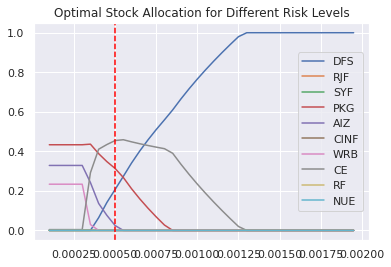

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['DFS','RJF','SYF','PKG','AIZ','CINF','WRB','CE','RF', 'NUE']
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.axvline(x=0.0005, color = 'red', linestyle = '--')
plt.show()

In [ ]:
# subset
riskm2 = list(returns.keys()) # coerce dict_keys to a list
print(riskm2)
rewardm2 = list(returns.values()) # coerce dict_values to a list
print(rewardm2) 

[0.0001, 0.00015000000000000001, 0.00020000000000000004, 0.00025, 0.00030000000000000003, 0.00035000000000000005, 0.0004, 0.00045000000000000004, 0.0005000000000000001, 0.0005500000000000001, 0.0006000000000000002, 0.0006500000000000002, 0.0007000000000000001, 0.0007500000000000001, 0.0008000000000000001, 0.0008500000000000002, 0.0009000000000000002, 0.0009500000000000002, 0.0010000000000000002, 0.0010500000000000002, 0.0011000000000000003, 0.0011500000000000002, 0.0012000000000000003, 0.0012500000000000002, 0.0013000000000000002, 0.0013500000000000003, 0.0014000000000000002, 0.0014500000000000003, 0.0015000000000000002, 0.0015500000000000004, 0.0016000000000000003, 0.0016500000000000004, 0.0017000000000000003, 0.0017500000000000003, 0.0018000000000000004, 0.0018500000000000003, 0.0019000000000000004, 0.0019500000000000003]
[0.002173940902640153, 0.0021739452279120157, 0.0021739352813964934, 0.0021739350268021045, 0.0021739345500926383, 0.002592890127630437, 0.002946044236064982, 0.003

## Efficient Frontier

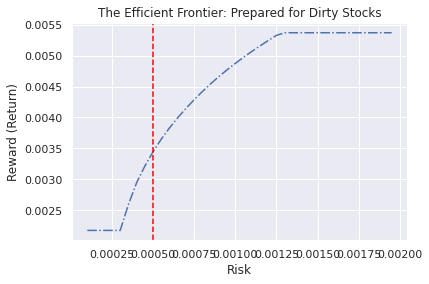

In [ ]:
# plot! pylab makes it easy
from pylab import *
plot(riskm2, rewardm2, '-.')
title('The Efficient Frontier: Prepared for Dirty Stocks')
xlabel('Risk')
ylabel('Reward (Return)')
plt.axvline(x=0.0005, color = 'red', linestyle = '--')
plt.show()

Note: At the risk level between 0.00025 and 0.0005 we can rapidly increase the growth in our returns with only a small increase in risk. Beyond this point our return begins to diminish with an increase in risk.

# Analysis

## Monthly Distributions
Combined Plot 

In [ ]:
# Assign the ticker list that we want to scrap

tickers_list = ['ECL','SEE','BLL','MET','PPG','AFL','PRU','C','DOW','STT', 'DFS','RJF','SYF','PKG','AIZ','CINF','WRB','CE','RF', 'NUE']

# from May 1, 2020 to December 31, 2020
m_prices = {ticker : si.get_data(ticker,start_date = '05/01/2020',end_date='12/31/2020',interval='1mo') for ticker in tickers_list}
m_prices

{'AFL':                  open       high        low  ...   adjclose    volume  ticker
 2020-05-01  36.290001  37.970001  30.320000  ...  35.422283  95190100     AFL
 2020-06-01  36.459999  42.189999  34.299999  ...  35.279182  85448200     AFL
 2020-07-01  35.959999  37.340000  33.820000  ...  34.828766  70679500     AFL
 2020-08-01  35.580002  38.939999  35.020000  ...  35.563137  62185100     AFL
 2020-09-01  36.000000  38.400002  34.919998  ...  35.860558  92328500     AFL
 2020-10-01  36.380001  38.720001  33.369999  ...  33.492878  71216700     AFL
 2020-11-01  34.590000  46.430000  34.220001  ...  43.338497  93294200     AFL
 2020-12-01  44.939999  46.349998  42.730000  ...  44.157234  79120800     AFL
 
 [8 rows x 7 columns],
 'AIZ':                   open        high         low  ...    adjclose    volume  ticker
 2020-05-01  104.339996  107.110001   83.889999  ...  100.385017  12833600     AIZ
 2020-06-01  103.180000  117.820000   97.669998  ...  101.713768  11095900     AIZ
 

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the ECL (one sample)
m_data = pd.DataFrame(m_prices['ECL']['adjclose']).rename(columns = {"adjclose":"ECL"})

for i in tickers_list[1:]:
  m_data[i] = pd.DataFrame(m_prices[i]['adjclose'])
# m_data

# create return features for each ticker, 
# we will just use a pct_change as the return

Mo_return_data = pd.DataFrame()
for i in tickers_list:
  Mo_return_data[i] = m_data[i].pct_change()
# drop the na records
Mo_return_data.dropna(inplace=True)
Mo_return_data

,ECL,SEE,BLL,MET,PPG,AFL,PRU,C,DOW,STT,DFS,RJF,SYF,PKG,AIZ,CINF,WRB,CE,RF,NUE
2020-06-01,-0.064117,0.023364,-0.022761,0.028513,0.049100,-0.004040,0.018442,0.077904,0.074854,0.042487,0.066105,-0.006495,0.100104,-0.015876,0.013237,0.086175,-0.011389,-0.039706,-0.016799,-0.020114
2020-07-01,-0.057492,0.091343,0.059577,0.036418,0.014992,-0.012767,0.040558,-0.021331,0.007360,0.012328,-0.013176,0.014934,-0.001354,-0.029057,0.040469,0.228991,0.080059,0.125782,-0.010928,0.023197
2020-08-01,0.053453,0.101457,0.091539,0.016116,0.118439,0.021085,0.069433,0.032547,0.098880,0.067409,0.073842,0.089810,0.131849,0.053267,0.131106,0.018991,0.004858,0.047536,0.064457,0.083671
2020-09-01,0.014004,-0.012468,0.036153,-0.021651,0.018891,0.008363,-0.047164,-0.156690,0.058832,-0.128653,0.098030,-0.039091,0.054817,0.077144,0.003054,-0.018134,-0.014504,0.062284,-0.002595,-0.013198
2020-10-01,-0.079189,0.024111,0.070741,0.018294,0.062582,-0.066025,0.007871,-0.039202,-0.033156,0.001448,0.125130,0.055981,-0.043943,0.057874,0.025225,-0.085665,-0.014964,0.056398,0.168880,0.074000
2020-11-01,0.210033,0.138166,0.078764,0.219815,0.131437,0.293962,0.181194,0.346029,0.165311,0.196604,0.171666,0.189822,0.228441,0.135470,0.038192,0.079304,0.083333,0.145279,0.148120,0.124372
2020-12-01,-0.026063,0.016201,-0.027963,0.029405,-0.013535,0.018892,0.047632,0.119666,0.060123,0.032633,0.195347,0.051897,0.139153,0.060846,0.060148,0.144335,0.019807,0.004717,0.055665,-0.009497


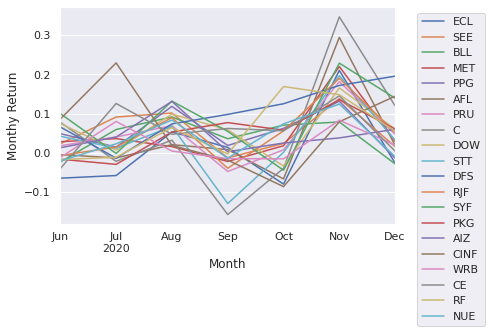

In [ ]:
# see what it looks like... messy... some volatility here!
Mo_return_data.plot()
plt.xlabel('Month')
plt.ylabel('Monthy Return')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show() # get rid of funky text

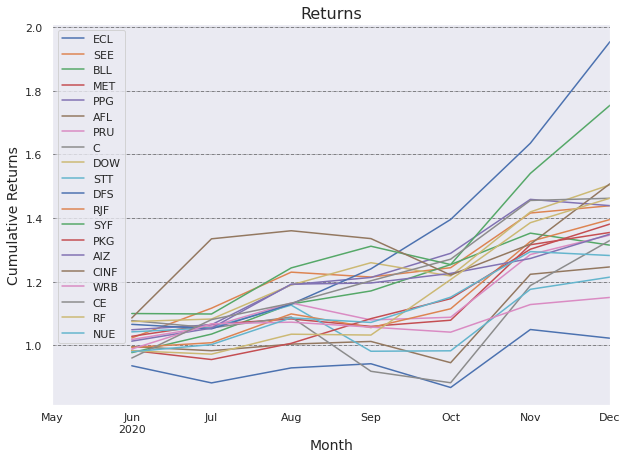

In [ ]:
# Plot all the close prices
((m_data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Month', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

## Efficient Frontier Comparison

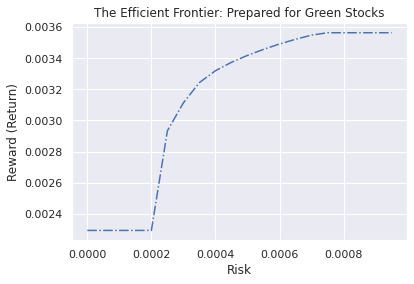

In [ ]:
plot(riskm1, rewardm1, '-.')
title('The Efficient Frontier: Prepared for Green Stocks')
xlabel('Risk')
ylabel('Reward (Return)')
plt.grid(True)
plt.show()

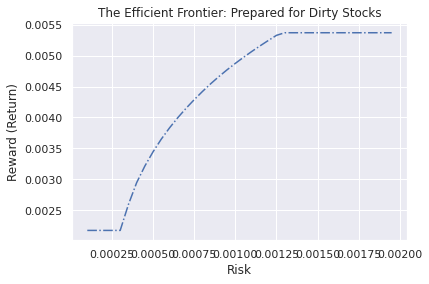

In [ ]:
plot(riskm2, rewardm2, '-.')
title('The Efficient Frontier: Prepared for Dirty Stocks')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

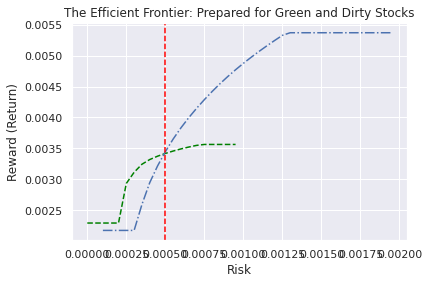

In [ ]:
# Combined charts for better visualization
plot(riskm1, rewardm1, color="green",  linestyle='dashed')
plot(riskm2, rewardm2, '-.')
title('The Efficient Frontier: Prepared for Green and Dirty Stocks')
xlabel('Risk')
ylabel('Reward (Return)')
plt.grid(True)
plt.axvline(x=0.0005,color = 'red', linestyle = '--')
plt.show()

At risk level 0.001, the returns for green stocks are around 0.0035, whereas at the same level of risk our dirty stocks have comparetively greater returns of about 0.0048.

The returns for green stocks plateau at about 0.0035 and a corresponding risk level of 0.00075, beyond which the returns stabalize and do not increase any further even on increasing risk levels.

Beyond a risk level of 0.001251, the returns for our set of dirty stocks begin to plateau at about 0.0054 and do not increase any further.

Our dirty stocks give much greater returns when compared to our set of green stocks albeit at higher risk levels.

## Initial Investment (1/1/2021 -> 3/1/2021)

Because using 1mo for ticker data and adjclose, range used it 1/1/21 to 3/2/21.

In [ ]:
# Ticker list
tickers_list = ['ECL','SEE','BLL','MET','PPG','AFL','PRU','C','DOW','STT']
# Historical prices
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='3/2/2021',interval='1mo') for ticker in tickers_list}
# Look only ad Adjclose
prep_data = pd.DataFrame(dow_prices['ECL']['adjclose']).rename(columns = {"adjclose":"ECL"})
# Put in Dataframe
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
print("Green Stocks")
print("")
prep_data

Green Stocks



,ECL,SEE,BLL,MET,PPG,AFL,PRU,C,DOW,STT
2021-01-01,204.052811,42.116501,87.866936,47.701370,134.177475,44.862240,77.173126,57.499863,51.329582,69.578262
2021-02-01,208.891983,41.747845,85.241516,57.063316,134.287048,47.553177,85.493782,65.879997,58.658142,72.331573
2021-03-01,213.591461,45.653610,84.739998,60.790001,150.259995,51.180000,91.099998,72.750000,63.939999,83.503860


In [ ]:
# Ticker list
tickers_list = ['NUE','DFS','RJF','SYF','PKG','AIZ','CINF','WRB','CE','RF']
# Historical prices
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='3/2/2021',interval='1mo') for ticker in tickers_list}
# Look only ad Adjclose
prep_data = pd.DataFrame(dow_prices['NUE']['adjclose']).rename(columns = {"adjclose":"NUE"})
# Put in Dataframe
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
print("Dirty Stocks")
print("")
prep_data

Dirty Stocks



,NUE,DFS,RJF,SYF,PKG,AIZ,CINF,WRB,CE,RF
2021-01-01,48.479389,83.156708,99.206512,33.444988,133.499298,134.741730,83.603661,62.139999,121.497612,16.884390
2021-02-01,59.512352,93.638397,116.369186,38.444344,131.076736,122.557579,97.303963,69.330002,138.168106,20.477657
2021-03-01,79.857178,94.989998,122.170700,40.660000,133.519150,141.770004,102.493767,75.349998,149.809998,20.507437


# Conclusion



*   It is important for the investors to be aware of the fact that risk level determines the return of their portfolio.
*   It has been observed that after a specific risk level the return of the portfolio goes up for dirty stocks.
* We observe from the risk level of 0.0004 the allocations of all the other stocks decreases but the allocation of DOW stock increases rapidly in the case of green stocks. 

* When the risk level moves to 0.0003 the allocation of all the other stocks decreases but the allocation of DFS stock increases rapidly in the case of dirty stocks

*   Keeping an eye for stock's performance history is vital in determining the selection of stocks. Histroical returns have to be analysed so as to predict their movement in a better way

* Post analysis we can now confidently state that when our risk is at 0.0005, our returns on both green and dirty stocks are the same. As the risk increase beyond that, the return from green stocks plateau. Meaning that even though the risk is increasing the return remains the same. In the case of dirty stocks the return keeps increasing beyond a risk of 0.0005 until it plateau at a risk of 0.0013

* We would suggest our investors to invest based on their tolerance for risk if they are looking for the lowest amount of risk and reasonable amount of return then our suggestion would be to invest more in green stocks and just in one or two dirty stocks 

* If investors are looking to have maximum return at optimum amount of risk then diversification of portfolio becomes paramount so that the returns are carefully mitigated and returns are maximized

* Risk limits have to be chosen carefully after a number of iterations so that we can plot a better efficient frontier so that we can see a better curve and see how return changes with risk which help us to choose right allocation of stocks